In [1]:
import numpy as np
import matplotlib
from matplotlib import transforms, pyplot as plt

%matplotlib inline
#%matplotlib

C:\Python\python-3.6.2\lib\site-packages\matplotlib\font_manager.py:1297: UserWarning: findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


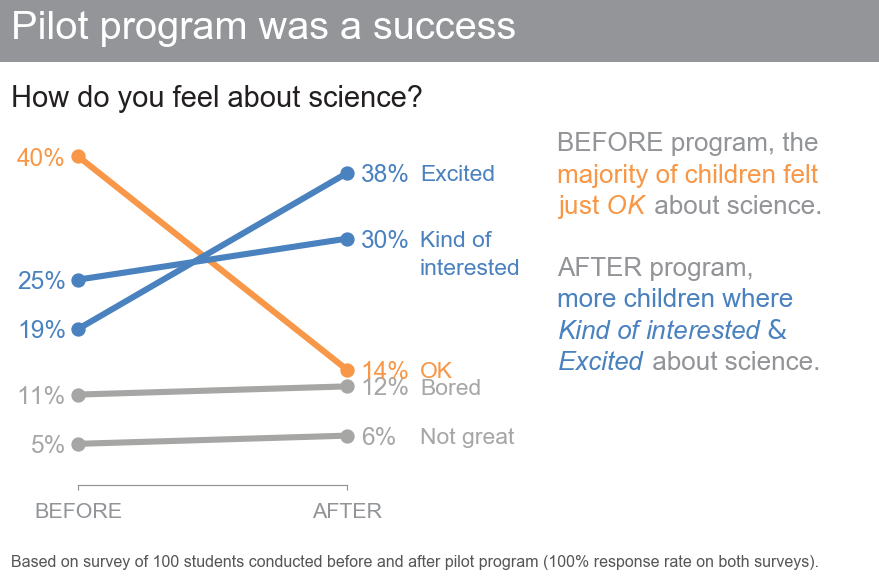

In [2]:
# configure plot font family to Arial
plt.rcParams['font.family'] = 'Arial'
# configure mathtext bold and italic font family to Arial
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.bf'] = 'Arial:bold'
matplotlib.rcParams['mathtext.it'] = 'Arial:italic'

# survey responses
X = ['Bored', 'Not great', 'OK', 'Kind of\ninterested', 'Excited']
Y = [11, 5, 40, 25, 19] # responses distribution before the program
Z = [12, 6, 14, 30, 38] # responses distribution after the program

# Battleship Grey (footnote)
color_gray1 = '#555655'
# Bobmay (Bored and Not great)
color_gray2 = '#A6A6A5'
# Grey Chateau (title background)
color_gray3 = '#939598'
# Aluminium (x axes labels)
color_gray4 = '#929497'
# Nero (survey question)
color_gray5 = '#231F20'
# Havelock Blue (Excited and Kind of interested)
color_blue2 = '#4A81BF'
# Sunshade (OK)
color_orange1 = '#F79747'

# assign colors for responses
C = [color_gray2, color_gray2, color_orange1, color_blue2, color_blue2]

# create new figure
fig, ax1 = plt.subplots(figsize=(7.6, 5.5), # width, height in inches 
                        dpi=110)            # resolution of the figure

# tune the subplot layout by setting sides of the figure
plt.subplots_adjust(left=0.065, right=0.43, top=0.76, bottom=0.19)

# set the data limits for the y-axis
ax1.set_ylim([0, 42])

# set properties for axes object
plt.setp(ax1, 
         xticks=[0, 1],                        # two x-ticks only 0 and 1
         xticklabels=['BEFORE', 'AFTER'],      # with text labels
         yticks=Y,                             # tick for all pre- responses %
         yticklabels=[str(v)+'%' for v in Y])  # with n% labels

# matplotlib doesn't have slopegraph drawing tool, so we use
# double axis approach
# create a twin Axes sharing the xaxis with the same limits for y-axis
ax2 = ax1.twinx()
ax2.set_ylim([0, 42])

# set properties for secondary axes object
plt.setp(ax2, 
         yticks=Z,                             # tick for all post- responses %
         yticklabels=[str(v)+'%' for v in Z])  # with n% labels

# change the appearance of ticks, tick labels, and gridlines 
# (don't show left and right ticks)
ax1.tick_params(left='off')
ax2.tick_params(right='off')

# remove chart borders for both axes
for spine in list(ax1.spines.values())+list(ax2.spines.values()):
    spine.set_visible(False)
    
# titile the plot
plt.text(-0.25, 54.3, 
         'Pilot program was a success'+' '*32, # trailing whitespaces for background
         fontsize=26, 
         color='white', 
         # put a rectangular box around the text to set a background color
         bbox={'facecolor':color_gray3, # background color
               'pad':10,                # add more padding
               'edgecolor':'none'})     # no border

# add survey question
plt.text(-0.25, 46, 'How do you feel about science?', fontsize=19, color=color_gray5)

# add footnote with the data source
plt.text(-0.25, -10,
         'Based on survey of 100 students conducted '
         'before and after pilot program '
         '(100% response rate on both surveys).',          
         fontsize=10.5,
         color=color_gray1)

# configure both y's tick labels appearance
for ax, xshift in ((ax1, 0.15), (ax2, -0.14)):
    for i, item in enumerate(ax.get_yticklabels()):
        item.set_fontsize(16)
        item.set_color(C[i])
        # use trasformations to shift y tick labels
        # left y labels slightly right, and right labels slightly left
        offset = transforms.ScaledTranslation(xshift, 0, fig.dpi_scale_trans)
        item.set_transform(item.get_transform() + offset)

# configure x tick label appearance
for item in ax1.get_xticklabels():
    item.set_fontsize(14)
    item.set_color(color_gray4)
    # use trasformations to shift x tick labels slightly down
    offset = transforms.ScaledTranslation(0, -0.07, fig.dpi_scale_trans)
    item.set_transform(item.get_transform() + offset)
    
# change x ticks color
ax1.tick_params(axis='x', colors=color_gray4)
# add bottom spine with gray color and bounds between 0 and 1
ax1.spines['bottom'].set_visible(True)
ax1.spines['bottom'].set_bounds(0, 1)
ax1.spines['bottom'].set_color(color_gray4)

# draw slopegraph lines with circles at ends
for i in range(5):
    # draw circles
    ax1.scatter([0, 1], [Y[i], Z[i]], color=C[i], s=70)
    # draw line
    ax1.plot([0, 1], [Y[i], Z[i]], color=C[i], linewidth=4)
    # add label
    plt.text(1.27, 
             Z[i] + (-1, -4.4)[i == 3], # shift third label down more
             X[i], 
             fontsize=15, 
             linespacing=1.5,
             color=C[i])
    
# matplotlib doesn't have a function for drawing text with 
# different colors, let's implement it
def rainbow_text(x, y, text, colors, spacing=20, ax=None, **kw):
    colors = list(reversed(colors))
    t = ax.transData
    canvas = ax.figure.canvas
    
    for i, line in enumerate(reversed(text.split('\n'))):
        strings = line.split('||')
        for s, c in zip(strings, colors[i]):
            text = ax.text(x, y, s, color=c, transform=t, **kw)
            text.draw(canvas.get_renderer())
            ex = text.get_window_extent()
            t = transforms.offset_copy(text._transform, x=ex.width, units='dots')

        t = transforms.offset_copy(ax.transData, x=0, y=(i+1)*spacing, units='dots')
        
# add before text note highlighthing some words orange
rainbow_text(1.78, 33, 
             'BEFORE program, the\n'
             'majority of children felt\n' 
             'just $\\mathit{OK}$|| about science.', 
             [[color_gray4], [color_orange1], [color_orange1, color_gray4]],
             spacing=31.5,
             ax=ax1,
             fontsize=17)

# add after text note highlighthing some words with blue
rainbow_text(1.78, 14, 
             'AFTER program,\n'
             'more children where\n'
             '$\\it{Kind\ of\ interested\ &}$\n'
             '$\\it{Excited}$|| about science.', 
             [[color_gray4], [color_blue2], [color_blue2], [color_blue2, color_gray4]],
             spacing=31.5,
             ax=ax1,
             fontsize=17)
